# Task 2 - Feedforward Neural Network with backpropagation


# Observation: 

1. In this task, we built a more complex model with more number of neuron layers. With ReLU, we achieved a slightly higher accuracy.
2. ReLU provides faster convergence than sigmoid. Sigmoid is more likely to suffer vanishing gradient that is it saturates when activation is close to 1 or -1.ReLU can also die but since we have a small network here, it doesn't seem to affect much. One way to fix it is to initialize weights and bias to non-zero help avoid dying ReLU.
3. Since we have a multi class classification here, we use softmax. it outputs probabilities rather than scalar values.Softmax is also suited for the loss function cross-entropy.
4. There is a slight drop in the accuracy plot for both training and test data. This could be attributed to the fact that it may have overjumped the local minima due to high learning rate alpha or SGD was not right. In case of test data, this zigzag could be fixed using regularization. In training data, this could be due to a new batch of untrained data. The same phenomena can  be observed on the loss-plot (loss increase rather than accuracy decrease)


### Sigmoid 
Final test accuracy 0.85
Final test loss 0.39

### ReLU 

Final test accuracy 0.88
Final test loss 0.34

In [22]:
from __future__ import print_function
# all tensorflow api is accessible through this
import tensorflow as tf
import numpy as np
# to visualize the results
import matplotlib.pyplot as plt
# 70k mnist dataset that comes with the tensorflow container
from tensorflow.examples.tutorials.mnist import input_data

# Enable deterministic comparisons between executions
tf.set_random_seed(0)

#Initializing values for the constants used below
IMAGE_SIZE = 28
IMAGE_PIXELS = IMAGE_SIZE * IMAGE_SIZE
NUM_CLASSES = 10
GD_LEARNING_RATE = 0.5
ADAM_LEARNING_RATE = 0.005
NUM_HIDDEN_1 = 200
NUM_HIDDEN_2 = 100
NUM_HIDDEN_3 = 60
NUM_HIDDEN_4 = 30



Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
y = 7 (Sneaker)


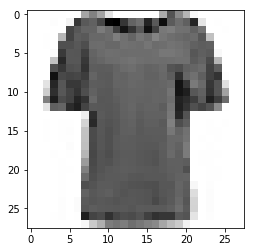

y = 1 (Trouser)


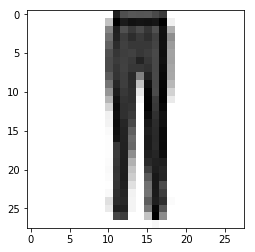

Number of train examples in dataset 55000
Number of test examples in dataset 10000
Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)


In [23]:
# load data
tf.set_random_seed(0)
# load data
mnist = input_data.read_data_sets('data/fashion', one_hot=True)

# Just used for personal reference
label_dict = {
 0: 'T-shirt-top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

#Checking to see if we got the right data set.
# Get 28x28 image
sample_1 = mnist.train.images[123].reshape(28,28)
# Get corresponding integer label from one-hot encoded data
sample_label_1 = np.where(mnist.train.labels[183] == 1)[0][0]
# Plot sample
print("y = {label_index} ({label})".format(label_index=sample_label_1, label=label_dict[sample_label_1]))
plt.imshow(sample_1, cmap='Greys')
plt.show()

# Sample 2

# Get 28x28 image
sample_2 = mnist.train.images[190].reshape(28,28)
# Get corresponding integer label from one-hot encoded data
sample_label_2 = np.where(mnist.train.labels[190] == 1)[0][0]
# Plot sample
print("y = {label_index} ({label})".format(label_index=sample_label_2, label=label_dict[sample_label_2]))
plt.imshow(sample_2, cmap='Greys')
plt.show()

print('Number of train examples in dataset ' + str(len(mnist.train.labels)))
print('Number of test examples in dataset ' + str(len(mnist.test.labels)))
print("Training set (images) shape: {shape}".format(shape= mnist.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=mnist.train.labels.shape))

In [24]:
# Define placeholders for input data and for input truth labels
x = tf.placeholder(tf.float32,
                   [None, IMAGE_SIZE, IMAGE_SIZE, 1])  # training examples (just one color channel, i.e grayscale)
y_ = tf.placeholder(tf.float32, [None, NUM_CLASSES])  # correct answers(labels)

# Define variables for the parameters of the model: Weights and biases, random-initialization with gaussian dist.
w_1 = tf.Variable((tf.truncated_normal([784, NUM_HIDDEN_1], stddev=0.1)))
b_1 = tf.Variable(tf.zeros([NUM_HIDDEN_1]))

w_2 = tf.Variable((tf.truncated_normal([NUM_HIDDEN_1, NUM_HIDDEN_2], stddev=0.1)))
b_2 = tf.Variable(tf.zeros([NUM_HIDDEN_2]))

w_3 = tf.Variable((tf.truncated_normal([NUM_HIDDEN_2, NUM_HIDDEN_3], stddev=0.1)))
b_3 = tf.Variable(tf.zeros([NUM_HIDDEN_3]))

w_4 = tf.Variable((tf.truncated_normal([NUM_HIDDEN_3, NUM_HIDDEN_4], stddev=0.1)))
b_4 = tf.Variable(tf.zeros([NUM_HIDDEN_4]))

w_5 = tf.Variable((tf.truncated_normal([NUM_HIDDEN_4, NUM_CLASSES], stddev=0.1)))
b_5 = tf.Variable(tf.zeros([NUM_CLASSES]))

# 2. Define the model - compute predicitions
xx = tf.reshape(x, [-1, IMAGE_PIXELS])  # flatten the images into a single vector of pixels (1D input, not 2D)

# Hidden unit acitvations : ReLU or Sigmoid

hidden1 = tf.nn.relu(tf.matmul(xx, w_1) + b_1)
hidden2 = tf.nn.relu(tf.matmul(hidden1, w_2) + b_2)
hidden3 = tf.nn.relu(tf.matmul(hidden2, w_3) + b_3)
hidden4 = tf.nn.relu(tf.matmul(hidden3, w_4) + b_4)

# hidden1 = tf.nn.sigmoid(tf.matmul(xx, w_1) + b_1)
# hidden2 = tf.nn.sigmoid(tf.matmul(hidden1, w_2) + b_2)
# hidden3 = tf.nn.sigmoid(tf.matmul(hidden2, w_3) + b_3)
# hidden4 = tf.nn.sigmoid(tf.matmul(hidden3, w_4) + b_4)


# Compute the logits, which basically is the inverse of the softmax outputs
logits = tf.matmul(hidden4, w_5) + b_5

# Define the loss, which is the loss between softmax of logits and the labels
# Tensorflow performs softmax (the output activation) as part of the loss for efficiency
cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=logits, name='xentropy'))

# 4. Define the accuracy
# Correct prediction is black/white, either the classification is correct or not
# Accuracy is the ratio of correct predictions over wrong predictions
correct_predictions = tf.equal(tf.argmax(logits, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

# 5. Train with an Optimizer
#train_step = tf.train.GradientDescentOptimizer(GD_LEARNING_RATE).minimize(cross_entropy_loss)
train_step = tf.train.AdamOptimizer(ADAM_LEARNING_RATE).minimize(cross_entropy_loss)

# initialize and run start operation
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


# Function representing a single iteration during training.
# Returns a tuple of accuracy and loss statistics.
def training_step(i, update_test_data, update_train_data):
    # actual learning
    # reading batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)
    # the backpropagation training step
    sess.run(train_step, feed_dict={xx: batch_X, y_: batch_Y})

    # evaluating model performance for printing purposes
    # evaluation used to later visualize how well you did at a particular time in the training
    train_a = []  # Array of training-accuracy for a single iteration
    train_c = []  # Array of training-cost for a single iteration
    test_a = []  # Array of test-accuracy for a single iteration
    test_c = []  # Array of test-cost for a single iteration

    # If stats for train-data should be updates, compute loss and accuracy for the batch and store it
    if update_train_data:
        train_acc, train_cos = sess.run([accuracy, cross_entropy_loss], feed_dict={xx: batch_X, y_: batch_Y})
        train_a.append(train_acc)
        train_c.append(train_cos)

    # If stats for test-data should be updates, compute loss and accuracy for the batch and store it
    if update_test_data:
        test_acc, test_cos = sess.run([accuracy, cross_entropy_loss],
                                      feed_dict={xx: mnist.test.images, y_: mnist.test.labels})
        test_a.append(test_acc)
        test_c.append(test_cos)

    return train_a, train_c, test_a, test_c


# 6. Train and test the model, store the accuracy and loss per iteration

train_accuracy = []  # Array of training-accuracy for each epoch
train_cost = []  # Array of training-cost for each epoch
test_accuracy = []  # Array of test-accuracy for each epoch
test_cost = []  # Array of test-cost for each epoch

NUM_TRAINING_ITER = 10000
NUM_EPOCH_SIZE = 100

for i in range(NUM_TRAINING_ITER):
    test = False
    if i % NUM_EPOCH_SIZE == 0:
        test = True
        print("iter: " + str(i))
    a, c, ta, tc = training_step(i, test, test)  
    # Update the stats with stats for this training step
    train_accuracy += a
    train_cost += c
    test_accuracy += ta
    test_cost += tc



iter: 0
iter: 100
iter: 200
iter: 300
iter: 400
iter: 500
iter: 600
iter: 700
iter: 800
iter: 900
iter: 1000
iter: 1100
iter: 1200
iter: 1300
iter: 1400
iter: 1500
iter: 1600
iter: 1700
iter: 1800
iter: 1900
iter: 2000
iter: 2100
iter: 2200
iter: 2300
iter: 2400
iter: 2500
iter: 2600
iter: 2700
iter: 2800
iter: 2900
iter: 3000
iter: 3100
iter: 3200
iter: 3300
iter: 3400
iter: 3500
iter: 3600
iter: 3700
iter: 3800
iter: 3900
iter: 4000
iter: 4100
iter: 4200
iter: 4300
iter: 4400
iter: 4500
iter: 4600
iter: 4700
iter: 4800
iter: 4900
iter: 5000
iter: 5100
iter: 5200
iter: 5300
iter: 5400
iter: 5500
iter: 5600
iter: 5700
iter: 5800
iter: 5900
iter: 6000
iter: 6100
iter: 6200
iter: 6300
iter: 6400
iter: 6500
iter: 6600
iter: 6700
iter: 6800
iter: 6900
iter: 7000
iter: 7100
iter: 7200
iter: 7300
iter: 7400
iter: 7500
iter: 7600
iter: 7700
iter: 7800
iter: 7900
iter: 8000
iter: 8100
iter: 8200
iter: 8300
iter: 8400
iter: 8500
iter: 8600
iter: 8700
iter: 8800
iter: 8900
iter: 9000
iter: 9100


Visualization of the loss and accuracy :

Final test accuracy 0.884
Final test loss 0.344249


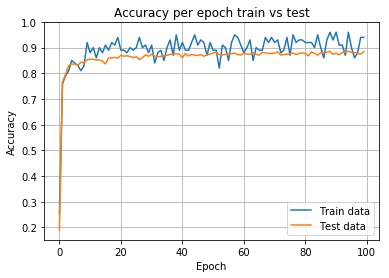

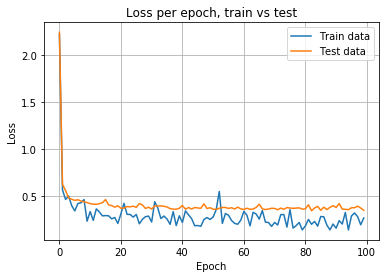

/Users/prashant/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


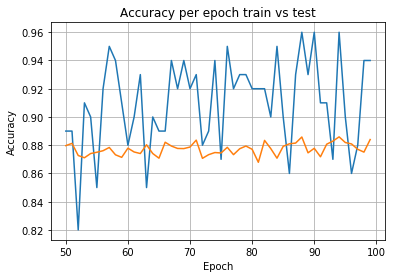

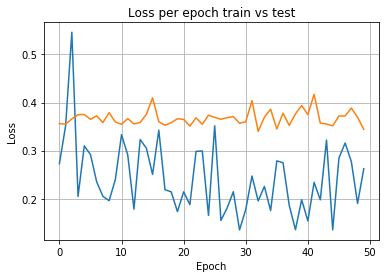

In [25]:
# 7. Plot and visualise the accuracy and loss

print('Final test accuracy ' + str(test_accuracy[-1]))
print('Final test loss ' + str(test_cost[-1]))

# accuracy training vs testing dataset
plt.plot(train_accuracy, label='Train data')
plt.xlabel('Epoch')
plt.plot(test_accuracy, label='Test data')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.title('Accuracy per epoch train vs test')
plt.show()

# loss training vs testing dataset
plt.plot(train_cost, label='Train data')
plt.plot(test_cost, label='Test data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss per epoch, train vs test')
plt.grid(True)
plt.show()

# Zoom in on the tail of the plots
zoom_point = 50
x_range = range(zoom_point, int(NUM_TRAINING_ITER / NUM_EPOCH_SIZE))
plt.plot(x_range, train_accuracy[zoom_point:])
plt.plot(x_range, test_accuracy[zoom_point:])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per epoch train vs test')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(train_cost[zoom_point:])
plt.plot(test_cost[zoom_point:])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per epoch train vs test')
plt.legend()
plt.grid(True)
plt.show()
